# モジュールのインストール

https://fasttext.cc/docs/en/english-vectors.html

2017年版のWikipedia、UMBC ウェブベース コーパス、 statmt.org ニュースの データセット (16億トークン) で学習された 100 万単語のベクトルを利用します。

In [1]:
#@title 学習済み埋め込みベクトルのダウンロード
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip
!git clone https://github.com/Michi-123/whiteGPT

--2025-03-28 16:58:19--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
dl.fbaipublicfiles.com (dl.fbaipublicfiles.com) をDNSに問いあわせています... 2600:9000:2828:5c00:13:6e38:acc0:93a1, 2600:9000:2828:1a00:13:6e38:acc0:93a1, 2600:9000:2828:f200:13:6e38:acc0:93a1, ...
dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2600:9000:2828:5c00:13:6e38:acc0:93a1|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 681808098 (650M) [application/zip]
`wiki-news-300d-1M.vec.zip' に保存中

wiki-news-300d-1M.v 100%[===================>] 650.22M  25.3MB/s 時間 29s        

2025-03-28 16:58:49 (22.6 MB/s) - `wiki-news-300d-1M.vec.zip' へ保存完了 [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   
fatal: destination path 'whiteGPT' already exists and is not an empty directory.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from whiteGPT import word2vec

In [2]:
# @markdown ベクトルの読み込み
vec_file_path = 'wiki-news-300d-1M.vec' #@param{type:'string'}
vectors = word2vec.load_vectors(vec_file_path)

In [3]:
# ベクトルの表示
vectors['paper']

array([-8.040e-02, -1.922e-01, -3.000e-04,  4.030e-02, -7.660e-02,
       -1.380e-02,  1.816e-01, -1.410e-02, -3.410e-02,  4.620e-02,
        1.583e-01, -1.650e-02, -4.960e-02, -1.444e-01,  5.600e-03,
       -1.008e-01,  5.980e-02, -4.630e-02, -7.650e-02,  6.900e-03,
       -1.139e-01, -4.300e-03,  8.360e-02, -6.390e-02,  1.218e-01,
       -3.410e-02, -2.860e-02,  4.300e-03, -8.100e-03,  1.429e-01,
       -6.200e-03, -1.041e-01,  2.440e-02, -2.800e-03, -1.483e-01,
        1.600e-03,  4.870e-02,  9.700e-02, -5.680e-02,  3.390e-02,
       -8.910e-02, -2.880e-02, -1.500e-02,  4.990e-02,  1.686e-01,
        6.470e-02, -1.750e-02,  5.820e-02,  8.570e-02,  2.973e-01,
       -6.380e-02,  8.300e-03, -6.145e-01, -1.868e-01, -5.430e-02,
        2.930e-02, -4.000e-04,  1.270e-02, -1.500e-02, -7.280e-02,
       -2.700e-02, -6.930e-02,  2.600e-02,  1.448e-01,  6.560e-02,
        7.000e-02,  6.550e-02,  8.700e-03, -2.350e-02,  6.990e-02,
       -1.510e-01, -8.290e-02, -1.106e-01, -8.140e-02, -1.827e

<BarContainer object of 300 artists>

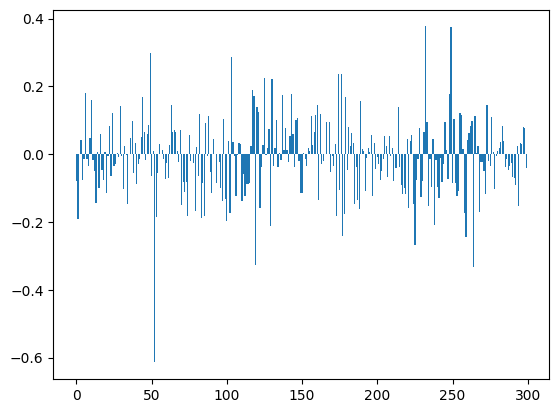

In [4]:
# 埋め込みベクトルのグラフ
# np.arangeは、指定した範囲の等差数列を生成する関数
labels = np.arange(len(vectors['paper']))
plt.bar(labels,  vectors['paper'])

# コサイン類似度


$$
    {cosine\_similarity}(A,B)=
    \frac{A⋅B}{||A||\space||B||}
​$$


In [5]:
# @title コサイン類似度の計算
import numpy as np

def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    # Linear algebra（線形代数）ライブラリの利用
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    norm = norm1 * norm2

    similarity = dot / norm

    return similarity

In [7]:
# 適当なテスト用のベクトルを作成
vector1 = np.array([0.1, 0.2, 0.3])
vector2 = np.array([-0.3, -0.2, -0.1])

# コサイン類似度の計算
similarity = cosine_similarity(vector1, vector2)
print("Cosine Similarity:", similarity)

Cosine Similarity: -0.7142857142857143


In [8]:
vector1 = vectors['paper']
vector2 = vectors['newspaper']
cosine_similarity(vector1, vector2)

np.float64(0.6706167391468212)

近いベクトルを抽出

In [9]:
# 基準となるベクトルと他のベクトルとの類似度を調べます。
vector1 = vectors['travel']

similarities = []

# keyとvalueを取得、items()は辞書のキーと値のペアを取得する
# keyが単語で、vector2はその単語のベクトル
for key, vector2 in vectors.items():
    similarity = cosine_similarity(vector1, vector2)

    # 類似度が0.6超のベクトルを収集
    if similarity > 0.6 :
        similarities.append([similarity, key])

In [10]:
# 収集したベクトルの数
len(similarities)

10

In [11]:
# 類似度の降順で並べ替え
similarities.sort(reverse=True)

In [12]:
# 先頭n件の表示
similarities[:10]

[[np.float64(1.0), 'travel'],
 [np.float64(0.7603609554648687), 'traveling'],
 [np.float64(0.7347434884597058), 'travelling'],
 [np.float64(0.7255005534370906), 'Travel'],
 [np.float64(0.6882540914094872), 'travels'],
 [np.float64(0.6665211463234465), 'trip'],
 [np.float64(0.6391544957330976), 'trips'],
 [np.float64(0.6144248363104245), 'journeys'],
 [np.float64(0.6131116626102255), 'traveler'],
 [np.float64(0.6026881236192687), 'journey']]

# ベクトル空間の四則演算の例を確認します

王 - 男 + 女 = 女王？

In [13]:
# king - man + woman
king = vectors['king']
queen = vectors['queen']
man = vectors['man']
woman = vectors['woman']
cosine_similarity(king-man + woman, queen)

np.float64(0.767376699858979)

夏 - 暑い + 寒い = 冬？

In [14]:
# 基準となるベクトル
hot = vectors['hot']
cold = vectors['cold']
summer = vectors['summer']
winter = vectors['winter']

In [15]:
# hot と cold
cosine_similarity(hot, cold)

np.float64(0.7127844651783529)

In [16]:
# hot と summer
cosine_similarity(hot, summer)

np.float64(0.48384715736855355)

In [17]:
# summer と winter
cosine_similarity(summer, winter)

np.float64(0.8376738582256028)

In [18]:
# (summer - hot + cold)と winter
cosine_similarity(summer - hot + cold, winter)

np.float64(0.7816870725903827)

<BarContainer object of 300 artists>

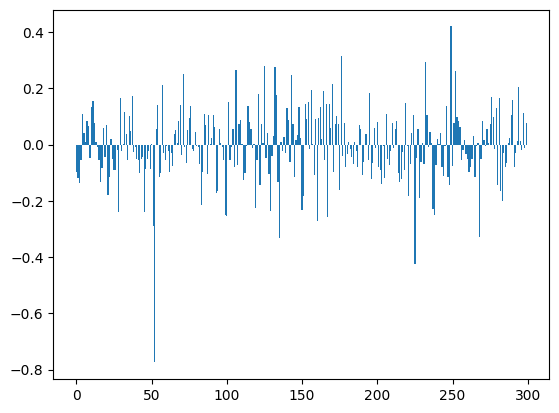

In [20]:
# `hot`ベクトルとは
labels = np.arange(300)
plt.bar(labels, hot)

In [21]:
#@title 特徴ベクトルの作成
def create_feature_vectors(vectors, keys):

    #300の特徴ベクトルを初期化
    feature_vectors = np.zeros(300)

    for key in keys:
        feature_vectors += vectors[key]

    feature_vectors /= len(keys)

    return feature_vectors

In [25]:
#@title 暑さの特徴ベクトルを見つける

# 暑い（熱い）単語
keys_hot = ['hot', 'boiling', 'beach','heat', 'August', 'burn','swimming']

# 寒い（冷たい）単語
keys_cold = ['cold', 'ice', 'winter', 'frozen', 'water','snow', 'coat','skiing']

# 特徴ベクトルの作成
feature_hot = create_feature_vectors(vectors, keys_hot)
feature_cold = create_feature_vectors(vectors, keys_cold)

In [26]:
# (summer - 暑さの特徴 + 寒さの特徴)と winter
cosine_similarity(summer - feature_hot + feature_cold, winter)

np.float64(0.8831522640795195)

In [27]:
# 温度の特徴ベクトル
temperature = feature_hot - feature_cold

In [28]:
# 本来の暑さとの関係はない（直交ベクトル）
cosine_similarity(temperature, hot)

np.float64(0.1443578250646571)

<BarContainer object of 300 artists>

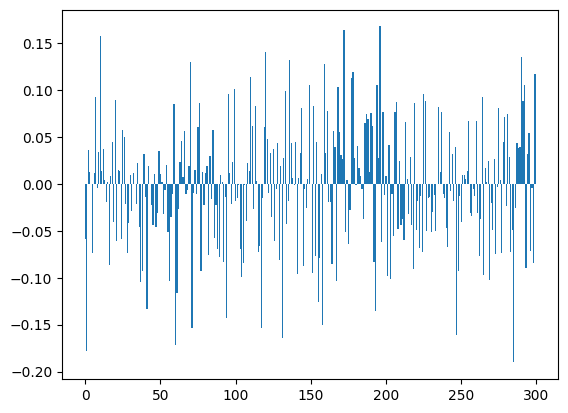

In [29]:
# 温度の特徴ベクトルを可視化
labels = np.arange(300)
plt.bar(labels, temperature)

In [35]:
# @title 練習
# king - man + woman = queen になるように、特徴ベクトルを見つけてみましょう

# 男性の特徴
keys_man = ['man', 'strong', 'men', 'power', 'cool', 'violent', 'brave', 'handsome']
# 女性の特徴
keys_woman = ['woman', 'beautiful', 'cute', 'lovely', 'kind', 'gentle', 'sweet']

# 特徴ベクトルの作成
feature_man = create_feature_vectors(vectors, keys_man)
feature_woman = create_feature_vectors(vectors, keys_woman)

father = vectors['father']
mother = vectors['mother']

# コサイン類似度
print(cosine_similarity(king - feature_man + feature_woman, queen))
print(cosine_similarity(father - feature_man + feature_woman, mother))

0.7628214607250631
0.8578857169378056


In [ ]:
# @title king - man + woman の例
king = vectors['king']
queen = vectors['queen']

# 男性の特徴
keys_man = ['male','boy','father','brother','beard','prince']
feature_man = create_feature_vectors(vectors, keys_man)

# 女性の特徴
keys_woman = ['female','girl','mother','sister','hair','princess']
feature_woman = create_feature_vectors(vectors, keys_woman)

cosine_similarity(king - feature_man + feature_woman*1.0, queen)

# 同じキーを取り出せるか？

In [36]:
# @title 類似する項目の検索
def search_similar_item(vectors, reference_vector):
    # 初期化
    max_similar_key = None # 最大の類似キー
    max_similarity = -float('inf')  # 最大の類似度
    similarity_list = {} # 類似度の一覧

    # 全てのベクトルに対して、reference_vectorとの類似度を算出します
    # enumerateは、ループしながらインデックスも取得できる
    # vectorsは辞書型なので、keyとvalueを取得
    for i, key in enumerate(vectors):

        # コサイン類似度の算出
        # vectors[key]は、key(単語)に対応するベクトル
        similarity = cosine_similarity(reference_vector, vectors[key])

        # 類似度が0.6を超えたら、類似度リストに追加
        if similarity > 0.6: # 閾値
            similarity_list[key] = similarity

        # 最大値の更新
        if max_similarity < similarity:
            max_similarity = similarity
            max_similar_key = key

    return max_similar_key, max_similarity, similarity_list

In [39]:
-float('inf' ) + 100000 # 何を足してもマイナス

-inf

In [40]:
# summer - feature_hot + feature_cold
reference_vector = summer - feature_hot + feature_cold
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [41]:
key

'winter'

In [42]:
# king - feature_man + feature_woman
reference_vector = king - feature_man + feature_woman
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [43]:
key

'king'

In [44]:
similarity_list

{'King': np.float64(0.6601657123171506),
 'king': np.float64(0.9135121091656809),
 'royal': np.float64(0.6495270002012574),
 'kingdom': np.float64(0.661323076115282),
 'lady': np.float64(0.6039287028138423),
 'queen': np.float64(0.7628214607250631),
 'prince': np.float64(0.6731057556102591),
 'kings': np.float64(0.7252146514978232),
 'ruler': np.float64(0.6087825462159456),
 'monarch': np.float64(0.6892699384191332),
 'emperor': np.float64(0.6039873417293253),
 'princess': np.float64(0.6873284754190592)}

# 地名で検証

In [46]:
tokyo  = vectors['Tokyo']
france = vectors['France']
paris = vectors['Paris']
japan = vectors['Japan']

In [47]:
# コサイン類似度
cosine_similarity(tokyo - japan + france, paris)

np.float64(0.8581427034450735)

In [48]:
# tokyo - japan + france, paris
reference_vector = tokyo - japan + france
key, similarity, similarity_list = search_similar_item(vectors, reference_vector)

In [49]:
key

'Paris'

In [50]:
similarity

np.float64(0.8581427034450735)

In [51]:
similarity_list

{'London': np.float64(0.6492047855513082),
 'France': np.float64(0.7769600992651915),
 'Paris': np.float64(0.8581427034450735),
 'Moscow': np.float64(0.6188102119469615),
 'Tokyo': np.float64(0.7074563706580036),
 'Madrid': np.float64(0.6197539955434833),
 'Brussels': np.float64(0.6365837658519496),
 'Lyon': np.float64(0.6317532344056058),
 'Bordeaux': np.float64(0.6409008598843251),
 'Marseille': np.float64(0.6422051102056436),
 'Toulouse': np.float64(0.662686424583182),
 'Strasbourg': np.float64(0.6166382004080777)}